# Using Logistic Regression Coefficiants to select the Features by `Mr. Harshit Dawar!`

In [1]:
# Loading the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
# Loading the Dataset

data = pd.read_csv("../../ds/dataset_2.csv")

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [4]:
X = data.drop("target", axis = 1)
y = data.target

In [5]:
X

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,1.798248e+01,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832e+00,0.976806,2.541417
1,5.821374,12.098722,1.330915e+01,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,5.679390e-01,1.018818,1.416433
2,1.938776,7.952752,9.726712e-01,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183e+00,1.575493,1.857893
3,6.020690,9.900544,1.786964e+01,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482e+00,0.946170,2.700606
4,3.909506,10.576516,9.341910e-01,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,5.110269e-01,2.599562,0.811364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.392593,1.336383,8.212083e+00,2.966147,2.387417,3.019191,2.289753,0.696969,9.218114,0.451762,...,2.393518,5.486381,2.420444,18.140092,16.388475,5.538263,0.982295,1.851852e+00,3.642670,1.264955
49996,3.544616,5.376492,-5.253303e-07,3.469798,3.473573,4.555753,1.238703,0.332744,15.448531,4.587770,...,2.452819,8.320470,4.880449,17.023601,14.157572,8.354363,1.852349,3.015394e-01,1.312911,1.473906
49997,4.266667,7.618359,1.728767e+01,3.241785,1.264538,2.392204,2.181862,0.703589,13.643899,1.555709,...,2.163462,6.931792,4.603708,18.112407,17.251750,7.588980,2.594008,2.230302e+00,2.525820,2.360954
49998,5.130579,6.749948,1.060437e+01,3.578128,2.770539,2.089231,2.698422,1.165991,11.427852,0.020571,...,0.938087,5.772450,2.003628,17.247582,16.112546,4.295269,0.847949,-5.341621e-07,0.252078,1.767468


In [6]:
y

0        1
1        0
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: target, Length: 50000, dtype: int64

In [7]:
"""
Scaling all the features to the same scale because it is one of the assumptions for the Feature Selection
Procedure using the Regression Coefficiants.
"""
X = StandardScaler().fit_transform(X)

In [8]:
X

array([[-0.09958649, -1.50609845,  0.98054192, ...,  0.29177902,
        -0.61781566,  0.18262403],
       [ 0.64945929,  2.18378207,  0.27208375, ..., -1.01561877,
        -0.58645541, -0.65526065],
       [-1.60733132,  0.44888441, -1.59807918, ...,  0.27815605,
        -0.17092607, -0.32646245],
       ...,
       [-0.25422604,  0.30895657,  0.87521269, ...,  0.53028125,
         0.5384454 ,  0.0482159 ],
       [ 0.24792974, -0.05443366, -0.13794996, ..., -1.54376905,
        -1.1587883 , -0.39381032],
       [-0.09655223, -0.20754963,  0.82360349, ...,  0.01147841,
        -0.42573185, -0.06909566]])

In [11]:
# Creating the Feature Selector
"""
Assigning a larger value to C, so that effect of Regularization is cancelled(to neglect the regularization
penalty effect on the coefficients), and using L2 Regularization i.e. Ridge Regression.
"""
Feature_Selector = SelectFromModel(
                        LogisticRegression(C = 5000, penalty = "l2", max_iter = 500)
                    )

Feature_Selector.fit(X, y)

SelectFromModel(estimator=LogisticRegression(C=5000, max_iter=500))

In [12]:
# True represents that the Feature is selected

"""Selection Criteria by Default is that if the coefficient value is > mean value of all the available
coefficients, then the Feature is selected!"""
Feature_Selector.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False])

In [16]:
count = 0
for i in Feature_Selector.get_support():
    if i:
        count += 1

print("Total Features Present: {}\nTotal Features Selected: {}".format(X.shape[1],
                                                                       count
                                                                      ))

Total Features Present: 108
Total Features Selected: 30


In [24]:
# Printing the Coefficients for the Features!

Feature_Selector.estimator_.coef_

array([[ 1.63169304e-02, -1.77518722e-02,  1.93080811e-01,
         8.60782090e-03,  4.02721242e-02, -2.20145285e-02,
        -8.85904163e-03, -4.95027709e-03,  3.10489794e-03,
        -1.29674518e-02,  6.17925852e-02,  2.92231603e-02,
        -1.85499614e-02,  1.88846021e-02, -2.41919652e-02,
         1.14158298e-01,  2.44250072e-03,  2.89037082e-02,
         2.84529927e-02,  1.31742886e-02,  1.38972522e-01,
         3.95968477e-02, -6.58836599e-02,  4.73965136e-02,
        -1.17606863e-02,  4.11292531e-02,  1.95344387e-03,
        -1.61135334e-02, -3.18052868e-02,  2.22873652e-03,
         6.54997394e-03, -9.91101757e-02, -8.29412289e-02,
         6.28252617e-03,  1.42743391e-02,  4.41646094e-02,
         2.39804881e-02,  3.22111082e-02,  5.52393228e-02,
         6.66290620e-02, -2.10614877e-02, -2.49220928e-02,
        -3.70458401e-02,  5.14747012e-02, -4.00089870e-03,
         2.04711274e-02,  4.98206987e-03,  2.89265713e-01,
        -9.15910066e-03,  3.36703295e-02,  1.77163174e-0

In [25]:
# Calcualting the Mean of the Features Weights or Coefficients

Feature_Selector.estimator_.coef_.mean()

0.013472691242242318

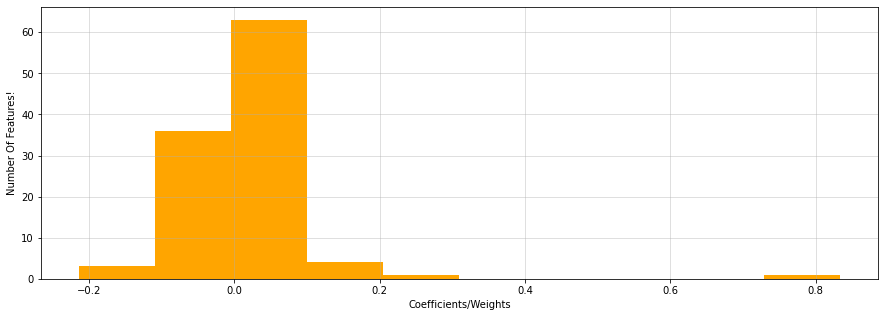

In [41]:
# Plotting the Histogram of the Coefficients Distribution!

pd.Series(Feature_Selector.estimator_.coef_.ravel()).plot.hist(figsize = (15, 5), color = "orange")
plt.xlabel("Coefficients/Weights")
plt.ylabel("Number Of Features!")
plt.grid(axis = "both", alpha = 0.5, animated = True)
plt.show()

***Some Values are positive & some are negative which is a very much normal behaviour, further let's plot the absolute value of coefficients & Number Of Features!***

In [42]:
# Calcualting the Mean of the Features Weights or Coefficients

np.abs(Feature_Selector.estimator_.coef_).mean()

0.05100323532032051

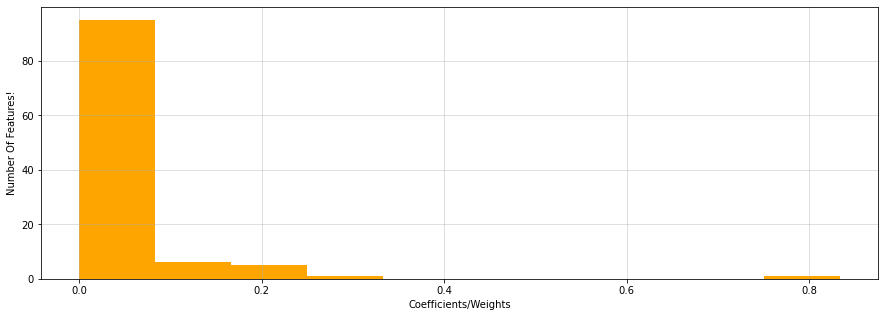

In [43]:
# Plotting the Histogram of the Coefficients Distribution!

pd.Series(np.abs(Feature_Selector.estimator_.coef_.ravel())).plot.hist(figsize = (15, 5), color = "orange")
plt.xlabel("Coefficients/Weights")
plt.ylabel("Number Of Features!")
plt.grid(axis = "both", alpha = 0.5, animated = True)
plt.show()

***We can easily Identify from here that most of the Features are having weights ~ 0, which means they are havong no contribution towards the prediction, & they should be removed!***

# Congratulations, you have learned another Interesting Way of Feature Selection!